#  Network Analysis

## Graph Visualisation

In this session, we will try to create more advanced network visualisations. First, we need to recreate the Karate network. Run the code below.

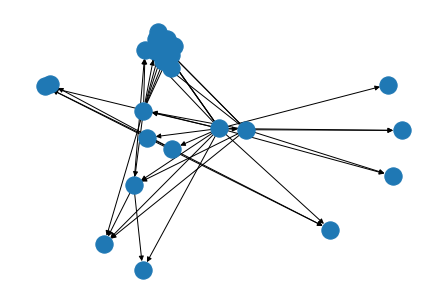

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import networkx as nx

karate_nodes = pd.read_csv("https://tinyurl.com/2p9byesa")
karate_edges = pd.read_csv("https://tinyurl.com/mtmwc8hd")
G = nx.from_pandas_edgelist(karate_edges, source = "from", target = "to", create_using=nx.DiGraph(), edge_attr = True)
node_attr = karate_nodes.set_index('id').to_dict('index')
nx.set_node_attributes(G, node_attr)

nx.draw(G)

There is a great number of options to improve this graph. You can, for instance, add the labels, use curved edges  and reduce the arrow size. Try: `nx.draw(G, with_labels=True, connectionstyle="arc3,rad=0.4", arrowsize=0.4)`

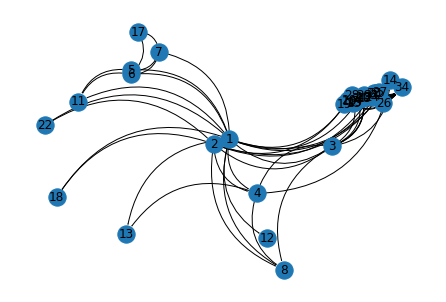

In [2]:
nx.draw(G, with_labels=True, connectionstyle="arc3,rad=0.4", arrowsize=0.4)

The ids are not very exciting as node labels. Let's try and use the first names. We can do this with the labels argument for nx.draw. 

Remember how we accessed the ids? Do the same with the names. It requires a dictionary mapping node id to the first name. That's easy to get with `node_labels = nx.get_node_attributes(G, 'first_name')`. 

In [3]:
node_labels = nx.get_node_attributes(G, 'first_name')

Now add this to nx.draw: `nx.draw(G, with_labels=True, labels=node_labels, connectionstyle="arc3,rad=0.4", arrowsize=0.4)`.

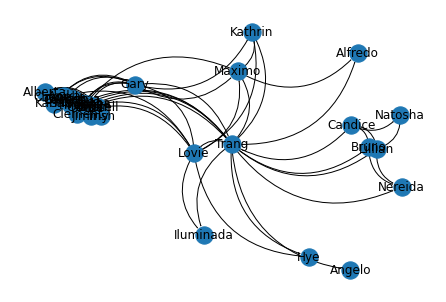

In [4]:
nx.draw(G, with_labels=True, labels=node_labels, connectionstyle="arc3,rad=0.4", arrowsize=0.4)

Let’s say we want to colour our network nodes based on gender as well as size them based on age. We will also change the width of the edges based on their weight. We need to apply a series of changes to the attributes pf our igraph. To get the different colours for different genders we need to add these colours to our data frame karate_nodes.
 
The Matlib colour names are listed at: https://matplotlib.org/stable/gallery/color/named_colors.html

np.where is one of the many functions of numpy that we will use a lot. It chooses either x or y (second and third argument) depending on the condition in the first argument. Type in:
```
karate_nodes['colour'] = np.where(karate_nodes['gender']== 'F', 'tomato', 'skyblue')
karate_nodes.head()
```

In [5]:
karate_nodes['colour'] = np.where(karate_nodes['gender']== 'F', 'tomato', 'skyblue')
karate_nodes.head()

,id,first_name,last_name,gender,age,colour
0,1,Trang,Philips,F,18,tomato
1,2,Lovie,Stanek,F,36,tomato
2,3,Gary,James,M,43,skyblue
3,4,Maximo,Larimer,M,41,skyblue
4,5,Bruno,Drury,M,18,skyblue


Now draw the graph again with another attribute node_color=np.array(karate_nodes['colour']). Type in: `nx.draw(G, node_color=np.array(karate_nodes['colour']), with_labels=True, labels=node_labels)`.

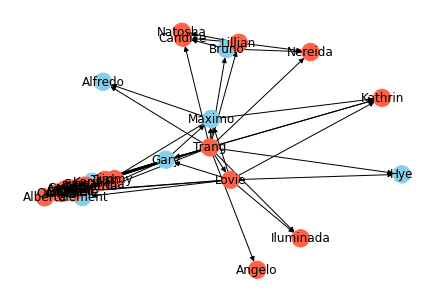

In [6]:
nx.draw(G, node_color=np.array(karate_nodes['colour']), with_labels=True, labels=node_labels) 

We also wanted to change the node size based on age. We could, for example, multiply the age by 10 to get the size that we want. Add `node_size = 10*np.array(karate_nodes['age'])` as an attribute to nx.draw.

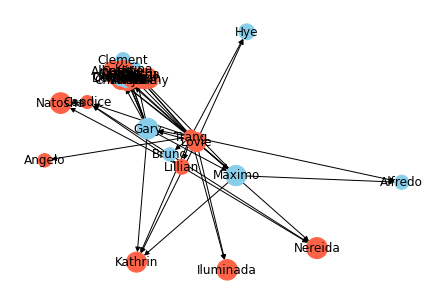

In [7]:
nx.draw(G, node_color=np.array(karate_nodes['colour']), node_size = 10*np.array(karate_nodes['age']),
                         with_labels=True, labels=node_labels) 

The weight of the like-relationship will determine the width of the arrow between two nodes. All we need to do is add another attribute. Type:
```
nx.draw(G, node_color=np.array(karate_nodes['colour']),
        node_size = 10*np.array(karate_nodes['age']),
        with_labels=True, labels=node_labels,
        width= 0.25 * np.array(karate_edges['weight']))
```

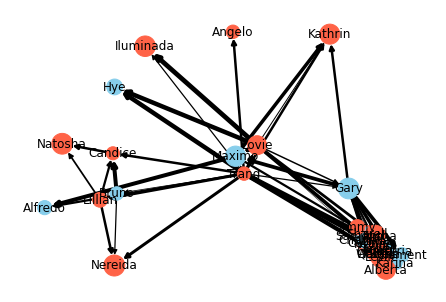

In [8]:
nx.draw(G, node_color=np.array(karate_nodes['colour']),
        node_size = 10*np.array(karate_nodes['age']),
        with_labels=True, labels=node_labels,
        width= 0.25 * np.array(karate_edges['weight']))

Actually, these graphs have never been that great. Too many overlaps ...

You can  plot graphs with different layouts to avoid overlaps. To adjust the graph layout, networkx contains layout generators, which try to place the vertices and edges in a way that is more visually appealing. They position ('pos') the nodes and edges on a plane defined by x-values and y-values.

There are many layout functions, let's first try a random one. Type:
```
pos = nx.random_layout(G)

nx.draw(G, pos, node_color=np.array(karate_nodes['colour']),
        node_size = 10*np.array(karate_nodes['age']),
        with_labels=True, labels=node_labels,
        width= 0.25 * np.array(karate_edges['weight']))
```

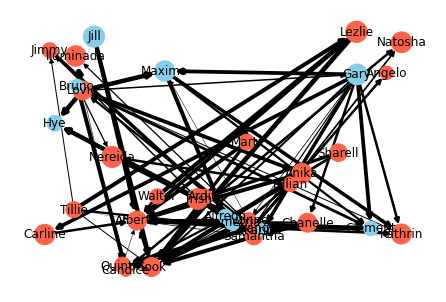

In [9]:
pos = nx.random_layout(G)

nx.draw(G, pos, node_color=np.array(karate_nodes['colour']),
        node_size = 10*np.array(karate_nodes['age']),
        with_labels=True, labels=node_labels,
        width= 0.25 * np.array(karate_edges['weight']))

This is indeed very random. We can  change the layout parameter and use another function. Fruchterman Reingold (https://en.wikipedia.org/wiki/Force-directed_graph_drawing) is a very popular layout algorithm. It's called spring layout in NetworkX. Change the first line of the last code block into `pos = nx.spring_layout(G)`.

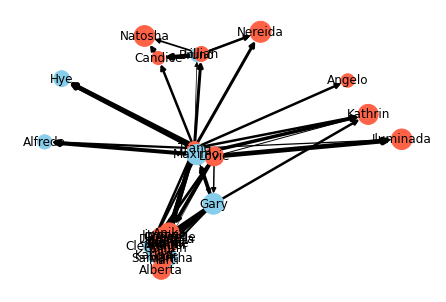

In [10]:
pos = nx.spring_layout(G)

nx.draw(G, pos, node_color=np.array(karate_nodes['colour']),
        node_size = 10*np.array(karate_nodes['age']),
        with_labels=True, labels=node_labels,
        width= 0.25 * np.array(karate_edges['weight']))

This is a bit better. Less overlap. Let's try another layout. Replace the pos line with `pos = nx.kamada_kawai_layout(G)`.

Also, the edges are too dark. A good trick is often to set their colours to greyscale. Also add:
```
nx.draw(G, pos, node_color=np.array(karate_nodes['colour']),
        node_size = 10*np.array(karate_nodes['age']),
        with_labels=True, labels=node_labels,
        edge_color="silver",
        width = 0.25 * np.array(karate_edges['weight']))
```

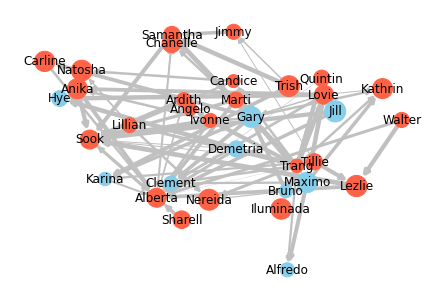

In [11]:
pos = nx.kamada_kawai_layout(G)

nx.draw(G, pos, node_color=np.array(karate_nodes['colour']),
        node_size = 10*np.array(karate_nodes['age']),
        with_labels=True, labels=node_labels,
        edge_color="silver",
        width = 0.25 * np.array(karate_edges['weight']))

Ok. At least everything is readable ... But it is still difficult to see any interesting patterns in the network. Remember, e.g., the original insight from the 1970s paper of the karate club? It described how the larger community of the whole club was effectively the result of several separate communities of members and split thererfore according to trust placed in either the administrator or instructor. Thus the whole karate club community can split up easily. Graph analysis comes with a lot of so-called community detection algorithms that support such investigations. We will use what many consider one of the best algorithms in this domain. Louvain is explained at https://towardsdatascience.com/louvain-algorithm-93fde589f58c. 

Let's first load the library with `from community import community_louvain`. You might have to install it first? Run the code below.

In [12]:
#install with pip install python-louvain

from community import community_louvain

ImportError: cannot import name 'community_louvain' from 'community' (/usr/local/lib/python3.9/site-packages/community/__init__.py)

Louvain requires undirected graphs. We create an undirected copy with `g = G.to_undirected()`.

In [13]:
g = G.to_undirected()

Now let's create the optimal partition of the graph according to Louvain. Run `partition = community_louvain.best_partition(g)`. Print out the items of the resulting dictionary with `partition.items()`. These contain the nodes and the partition they belong to.

In [14]:
partition = community_louvain.best_partition(g)
partition.items()

dict_items([(1, 0), (2, 1), (3, 1), (4, 1), (5, 0), (6, 0), (7, 0), (8, 1), (9, 3), (11, 0), (12, 0), (13, 1), (14, 1), (18, 1), (20, 0), (22, 1), (32, 2), (31, 1), (10, 3), (28, 2), (29, 3), (33, 3), (17, 0), (34, 3), (15, 3), (16, 3), (19, 3), (21, 3), (23, 3), (24, 2), (26, 2), (30, 3), (25, 2), (27, 3)])

Louvain creates four partitions (0 - 3). Let's plot these partitions by colour-coding the nodes. Run:
```
pos = nx.spring_layout(g)
nx.draw(g, pos, node_color=list(partition.values()), with_labels=True, cmap=plt.cm.Set3)
```
cmap=plt.cm.Set3 is new and chooses a colormap for Python to assign a colour to each partition. Colormaps are very powerful: 
https://www.analyticsvidhya.com/blog/2020/09/colormaps-matplotlib/

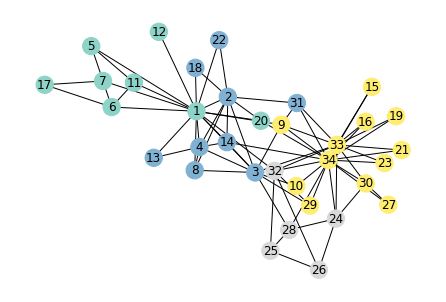

In [15]:
pos = nx.spring_layout(g)
nx.draw(g, pos, node_color=list(partition.values()), with_labels=True, cmap=plt.cm.Set3)

This graph already indicates that some members hold the whole network together by being the main link between the various 4 communities Lourain has detected. Let’s investigate this further and visualise the degree by which members are connected to other members. A graph degree basically counts the number of connections a member has to other members. Let’s overwrite the size of each nodes with the degree. First though we need to calculate the degree for each node. That’s very easy using igraph’s degree function. Simply type graph.degree()

In [16]:
degree_list = [50*g.degree[n] for n in g.nodes()]
degree_list[:5]

[800, 450, 500, 300, 150]

Now, let’s reassign the size of the nodes with setting vertex_size= vertex_size=graph.degree()

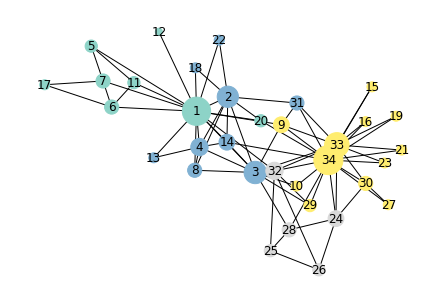

In [17]:
nx.draw(g, pos, node_color=list(partition.values()), node_size=degree_list, with_labels= True, cmap=plt.cm.Set3)

The new graph clearly shows  where the potential breaking points in the network are. Social network analysis is a very powerful tool with a large community already out there. Check it out and happy playing!